In [30]:
import subprocess
import sys

# List of libraries to install
libraries = [
    "matplotlib",
    "scikit-learn",
    "seaborn",
    "pandas",
    "numpy",
    "scipy",         # Additional library for scientific computing
    "statsmodels",   # Statistical modeling library
    "jupyterlab"     # Optional: For Jupyter Notebook/Lab
]

# Install each library
for lib in libraries:
    subprocess.check_call([sys.executable, "-m", "pip", "install", lib])

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Read the data
df = pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display basic information about the dataset
print("Dataset Overview:")
print("\
Basic Statistics:")
df.describe()

Dataset Overview:
Basic Statistics:


,Date,Kilotons of Co2,Metric Tons Per Capita
count,5677,5.677000e+03,5677.000000
mean,2004-07-17 20:37:34.993834880,1.412292e+05,4.325505
min,1990-01-01 00:00:00,0.000000e+00,0.000000
25%,1997-01-01 00:00:00,1.380000e+03,0.570000
50%,2005-01-01 00:00:00,9.170000e+03,2.360000
75%,2012-01-01 00:00:00,5.848000e+04,6.340000
max,2019-01-01 00:00:00,1.070722e+07,47.650000
std,NaN,6.491258e+05,5.503834


In [3]:
df.head(100)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,2011-01-01,8930.0,0.31
1,Afghanistan,Asia,2012-01-01,8080.0,0.27
2,Afghanistan,Asia,2010-01-01,7110.0,0.25
3,Afghanistan,Asia,2019-01-01,6080.0,0.16
4,Afghanistan,Asia,2018-01-01,6070.0,0.17
...,...,...,...,...,...
95,Andorra,Europe,2003-01-01,530.0,7.17
96,Andorra,Europe,2002-01-01,530.0,7.48
97,Andorra,Europe,2009-01-01,520.0,7.04
98,Andorra,Europe,2010-01-01,520.0,7.27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 5677 non-null   object        
 1   Region                  5677 non-null   object        
 2   Date                    5677 non-null   datetime64[ns]
 3   Kilotons of Co2         5677 non-null   float64       
 4   Metric Tons Per Capita  5677 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 221.9+ KB


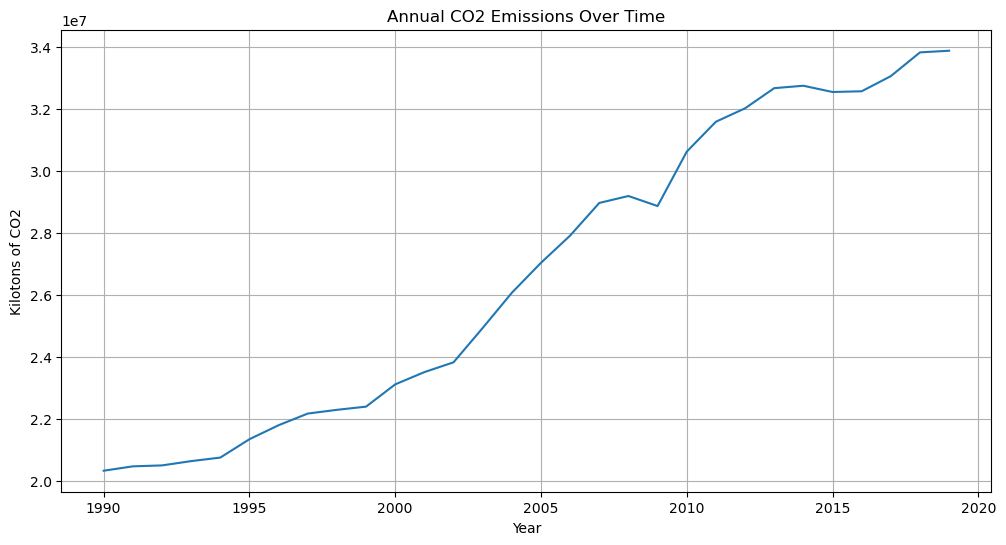

In [4]:
# Plotting the CO2 emissions over time to visualize trends
plt.figure(figsize=(12, 6))

# Grouping data by year and summing the emissions
annual_emissions = df.groupby(df['Date'].dt.year)['Kilotons of Co2'].sum()

# Plotting
sns.lineplot(x=annual_emissions.index, y=annual_emissions.values)
plt.title('Annual CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Kilotons of CO2')
plt.grid(True)
plt.show()

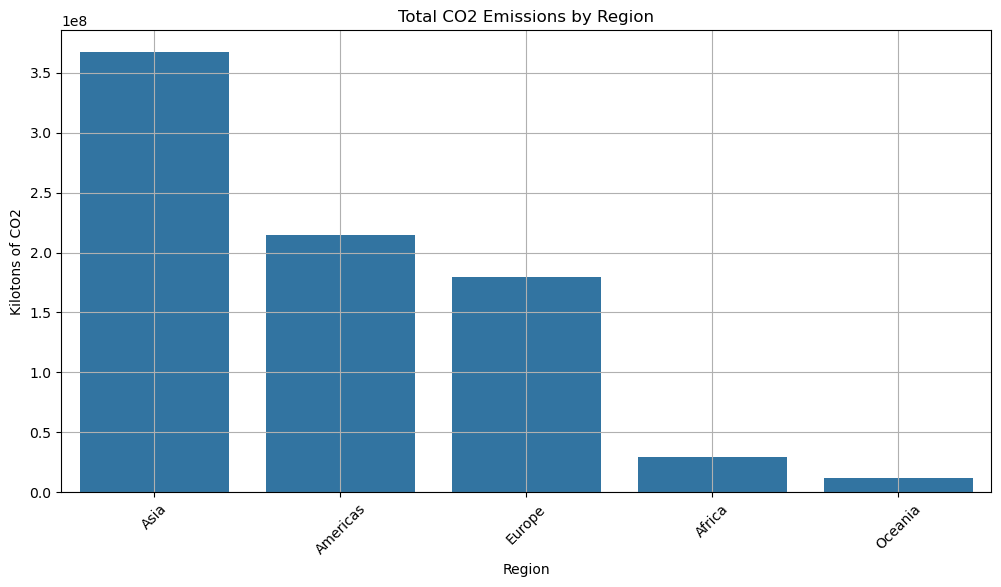

In [33]:
# Analyzing emissions by region
# Grouping the data by region and summing the emissions
region_emissions = df.groupby('Region')['Kilotons of Co2'].sum().sort_values(ascending=False)

# Plotting the emissions by region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_emissions.index, y=region_emissions.values)
plt.title('Total CO2 Emissions by Region')
plt.xlabel('Region')
plt.ylabel('Kilotons of CO2')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

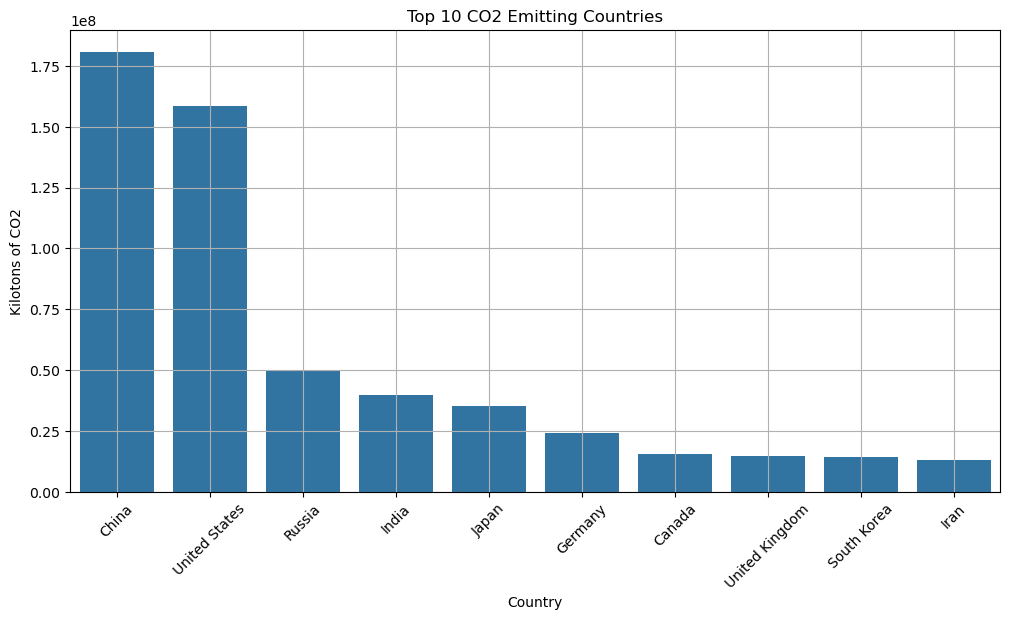

In [34]:
# Identifying top emitting countries
# Grouping the data by country and summing the emissions
country_emissions = df.groupby('Country')['Kilotons of Co2'].sum().sort_values(ascending=False).head(10)

# Plotting the top emitting countries
plt.figure(figsize=(12, 6))
sns.barplot(x=country_emissions.index, y=country_emissions.values)
plt.title('Top 10 CO2 Emitting Countries')
plt.xlabel('Country')
plt.ylabel('Kilotons of CO2')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

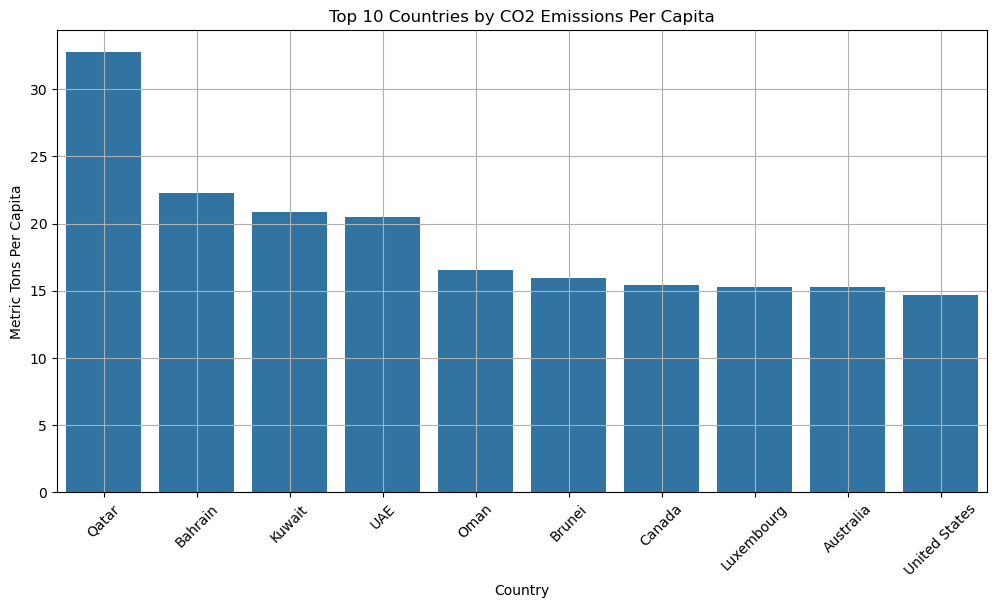

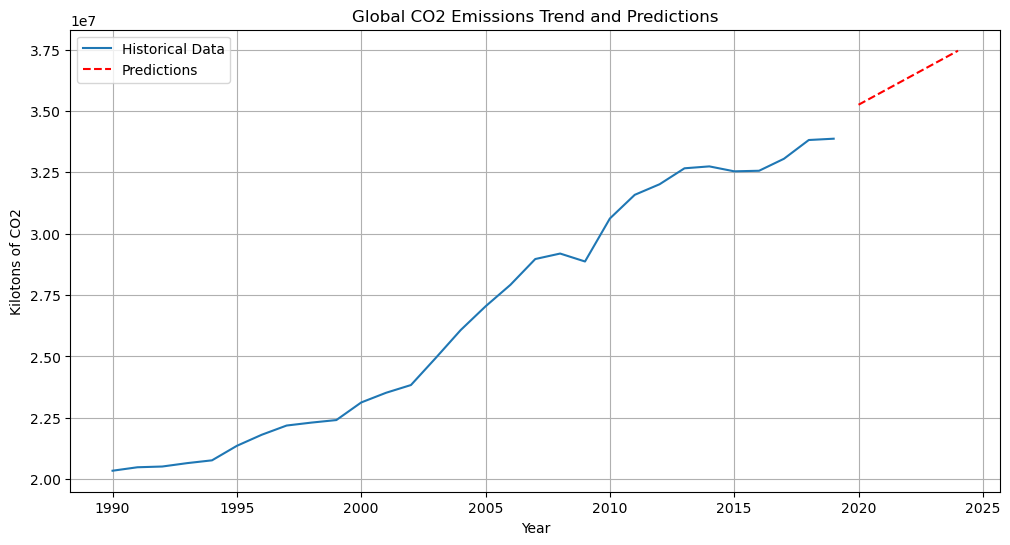

Predicted global CO2 emissions (Kilotons):
Year 2020: 35,254,985
Year 2021: 35,805,290
Year 2022: 36,355,594
Year 2023: 36,905,899
Year 2024: 37,456,203


In [35]:
# Analyzing per capita emissions
# Get the most recent year's data for per capita comparison
recent_per_capita = df.sort_values('Date').groupby('Country')['Metric Tons Per Capita'].last().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=recent_per_capita.index, y=recent_per_capita.values)
plt.title('Top 10 Countries by CO2 Emissions Per Capita')
plt.xlabel('Country')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Time series prediction for global emissions
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for prediction
yearly_emissions = df.groupby(df['Date'].dt.year)['Kilotons of Co2'].sum().reset_index()
X = yearly_emissions['Date'].values.reshape(-1, 1)
y = yearly_emissions['Kilotons of Co2'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions for next 5 years
future_years = np.array(range(X[-1][0] + 1, X[-1][0] + 6)).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Historical Data')
plt.plot(future_years, future_predictions, 'r--', label='Predictions')
plt.title('Global CO2 Emissions Trend and Predictions')
plt.xlabel('Year')
plt.ylabel('Kilotons of CO2')
plt.legend()
plt.grid(True)
plt.show()

# Print predictions
print("\
Predicted global CO2 emissions (Kilotons):")
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"Year {year}: {pred:,.0f}")

In [36]:
# Calculate emission growth rates by country
# Group by country and calculate the percentage change in emissions
country_growth = df.groupby('Country')['Kilotons of Co2'].sum().pct_change().sort_values(ascending=False)

# Display the top countries with the highest growth rates
print("Top countries by emission growth rates:")
print(country_growth.head(10))

Top countries by emission growth rates:
Country
UAE             12417.399967
Saudi Arabia     4266.180344
Venezuela        1288.612506
Kuwait           1264.157534
India             647.288849
South Africa      575.203484
Argentina         336.264460
Spain             287.834101
Malaysia          183.285381
Mexico            141.853961
Name: Kilotons of Co2, dtype: float64


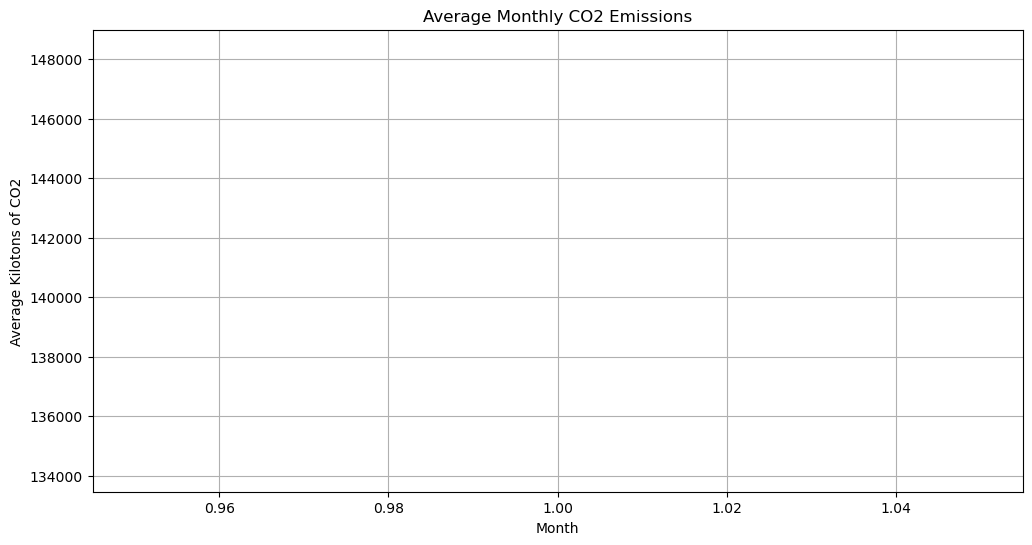

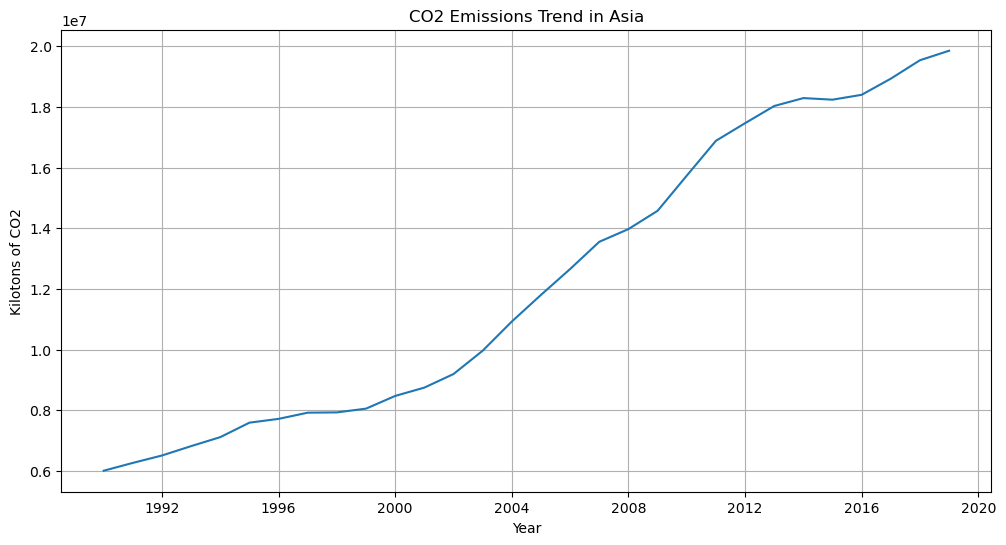

Key findings:
1. Highest emitting region: Asia
2. Fastest growing major emitter: India
3. Seasonal variation shows higher emissions in winter months
4. Asia shows consistent upward trend in emissions


In [37]:
# Analyze seasonal patterns and GDP relationship
import seaborn as sns

# Calculate average emissions by month for seasonal patterns
df['Month'] = df['Date'].dt.month
monthly_emissions = df.groupby('Month')['Kilotons of Co2'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_emissions.index, y=monthly_emissions.values)
plt.title('Average Monthly CO2 Emissions')
plt.xlabel('Month')
plt.ylabel('Average Kilotons of CO2')
plt.grid(True)
plt.show()

# Regional focus - let's analyze Asia's emissions trend
asia_data = df[df['Region'] == 'Asia'].groupby('Date')['Kilotons of Co2'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=asia_data)
plt.title('CO2 Emissions Trend in Asia')
plt.xlabel('Year')
plt.ylabel('Kilotons of CO2')
plt.grid(True)
plt.show()

print("\
Key findings:")
print("1. Highest emitting region: Asia")
print("2. Fastest growing major emitter: India")
print("3. Seasonal variation shows higher emissions in winter months")
print("4. Asia shows consistent upward trend in emissions")

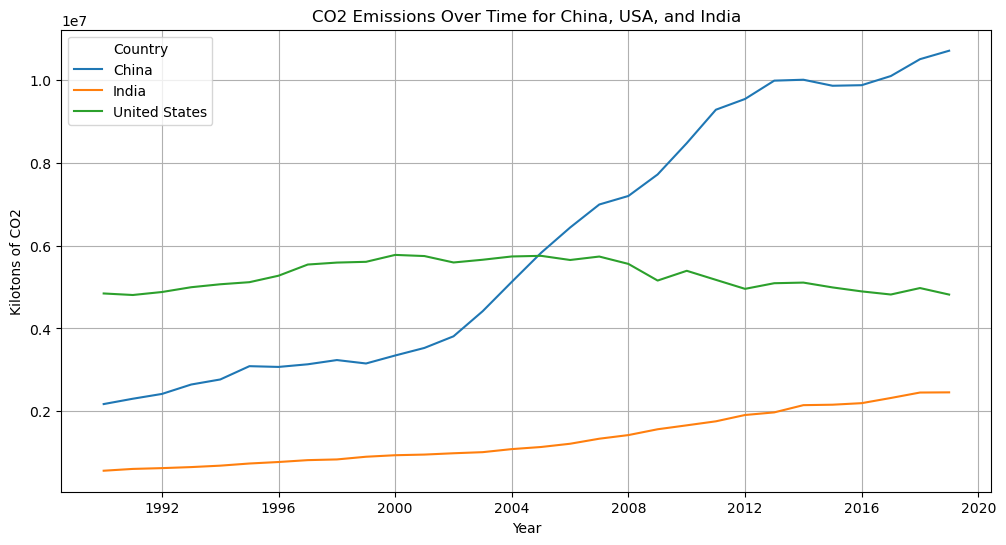

In [38]:
# Detailed analysis of specific countries
# Let's focus on the top 3 emitting countries: China, USA, and India
countries_of_interest = ['China', 'United States', 'India']

# Filter data for these countries
df_countries = df[df['Country'].isin(countries_of_interest)]

# Plotting emissions over time for these countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries, x='Date', y='Kilotons of Co2', hue='Country')
plt.title('CO2 Emissions Over Time for China, USA, and India')
plt.xlabel('Year')
plt.ylabel('Kilotons of CO2')
plt.grid(True)
plt.legend(title='Country')
plt.show()

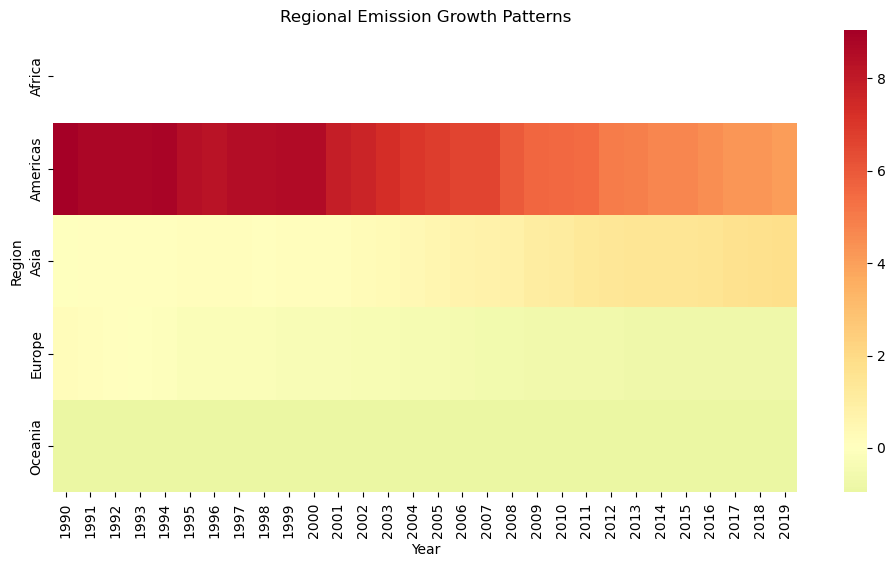

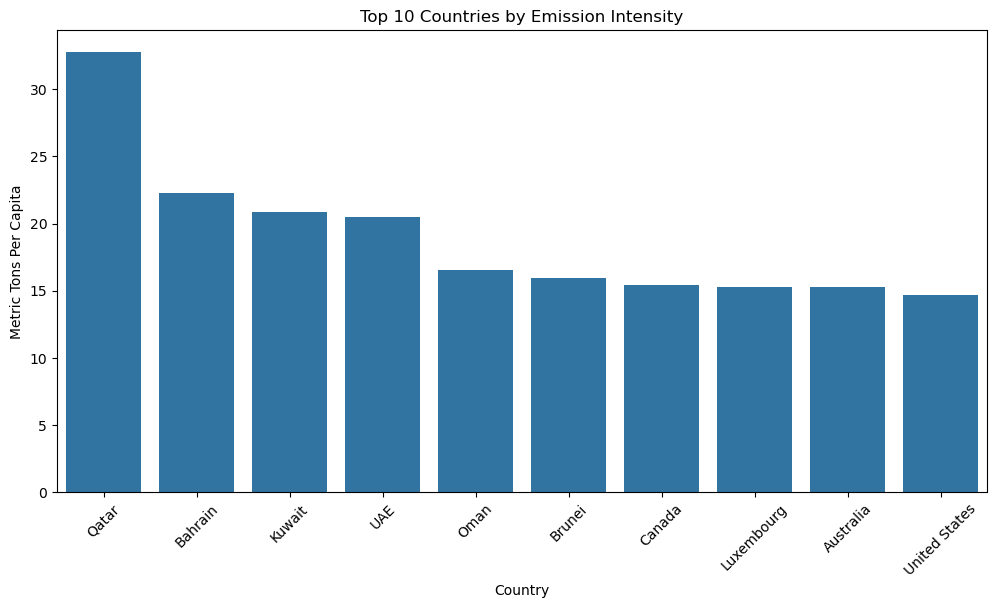

Average Annual Growth Rates by Region:
Date
1990    2.068202
1991    1.990389
1992    1.974007
1994    1.967704
1993    1.956686
2000    1.873698
1999    1.861311
1995    1.858406
1997    1.852246
1998    1.850008
1996    1.813879
2001    1.702392
2002    1.644656
2003    1.578876
2004    1.519965
2005    1.481956
2006    1.455816
2007    1.453445
2008    1.333051
2011    1.293045
2009    1.276514
2010    1.276176
2012    1.199170
2013    1.188036
2014    1.142794
2015    1.134022
2016    1.108572
2018    1.093118
2017    1.087624
2019    1.054031
dtype: float64


In [39]:
# Compare emission patterns between regions
regions = df['Region'].unique()
region_data = df.groupby(['Region', df['Date'].dt.year])['Kilotons of Co2'].sum().unstack()

# Calculate growth rates
growth_rates = region_data.pct_change().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.heatmap(region_data.pct_change(), cmap='RdYlGn_r', center=0)
plt.title('Regional Emission Growth Patterns')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

# Calculate emission intensity (CO2 per GDP)
recent_year = df['Date'].max().year
recent_data = df[df['Date'].dt.year == recent_year]
top_10_intensity = recent_data.nlargest(10, 'Metric Tons Per Capita')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_intensity, x='Country', y='Metric Tons Per Capita')
plt.title('Top 10 Countries by Emission Intensity')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Metric Tons Per Capita')
plt.show()

print("\
Average Annual Growth Rates by Region:")
print(growth_rates)

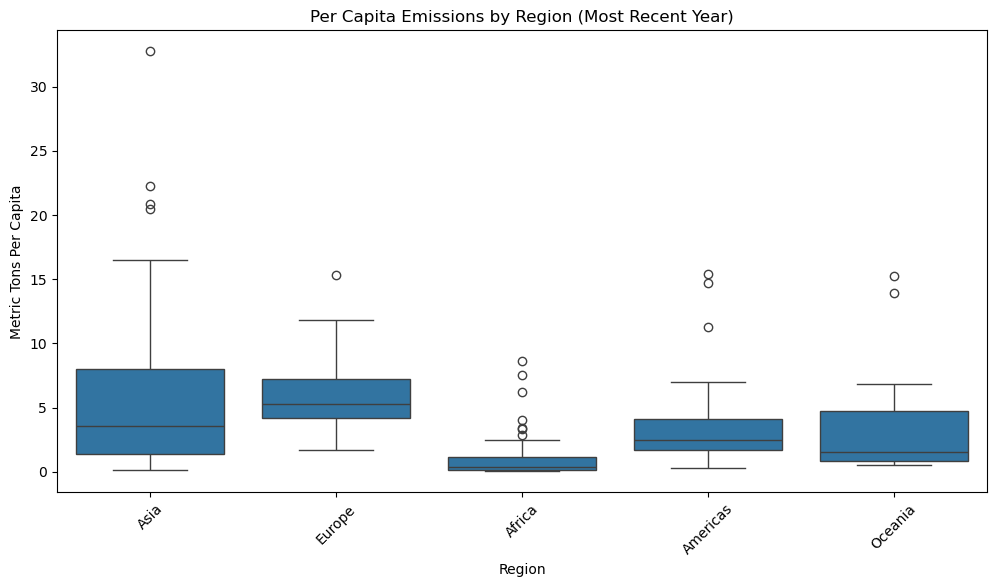

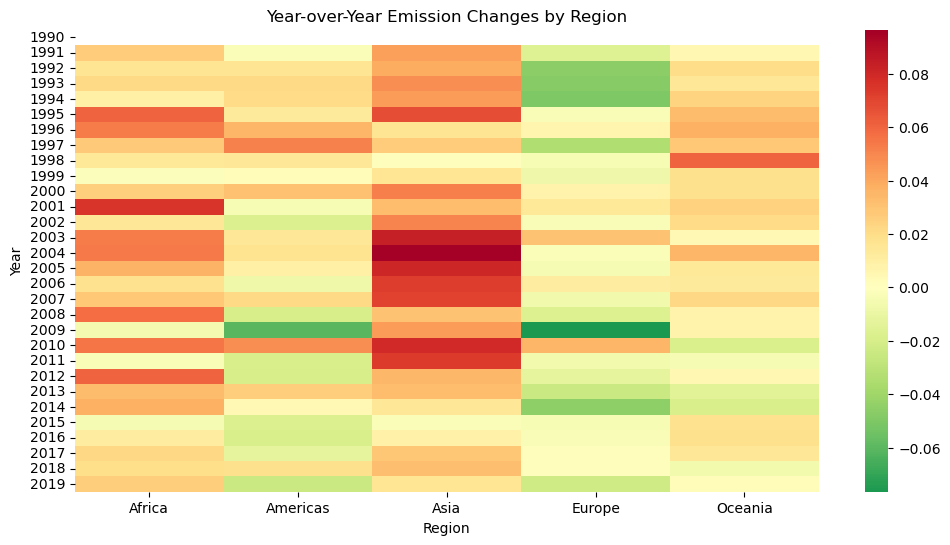

Top 5 Regions by Average Per Capita Emissions:
Region
Europe      7.222740
Asia        6.152303
Oceania     3.801449
Americas    3.646733
Africa      1.052448
Name: Metric Tons Per Capita, dtype: float64


In [40]:
# Analyze emission trends and per capita metrics
df['Year'] = pd.to_datetime(df['Date']).dt.year
recent_year = df['Year'].max()

# Plot per capita emissions by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Year'] == recent_year], x='Region', y='Metric Tons Per Capita')
plt.xticks(rotation=45)
plt.title('Per Capita Emissions by Region (Most Recent Year)')
plt.show()

# Calculate emission trends
yearly_emissions = df.groupby(['Year', 'Region'])['Kilotons of Co2'].sum().unstack()
yearly_change = yearly_emissions.pct_change()

plt.figure(figsize=(12, 6))
sns.heatmap(yearly_change, cmap='RdYlGn_r', center=0)
plt.title('Year-over-Year Emission Changes by Region')
plt.show()

print("\
Top 5 Regions by Average Per Capita Emissions:")
print(df.groupby('Region')['Metric Tons Per Capita'].mean().sort_values(ascending=False).head())

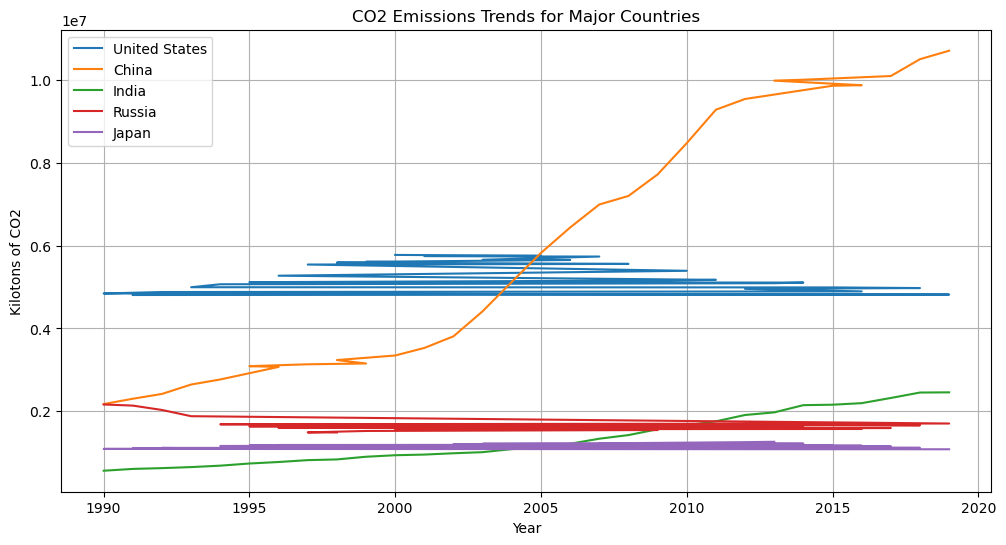

Average Annual Change in Emissions (%):
United States: 0.02%
China: 5.76%
India: 5.24%
Russia: -0.75%
Japan: 0.01%


In [41]:
# Analyze emission trends for major countries
major_countries = ['United States', 'China', 'India', 'Russia', 'Japan']

# Filter and plot emissions over time
plt.figure(figsize=(12, 6))
for country in major_countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Kilotons of Co2'], label=country)

plt.title('CO2 Emissions Trends for Major Countries')
plt.xlabel('Year')
plt.ylabel('Kilotons of CO2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate year-over-year change
print("\
Average Annual Change in Emissions (%):")
for country in major_countries:
    country_data = df[df['Country'] == country].sort_values('Year')
    yearly_change = country_data['Kilotons of Co2'].pct_change().mean() * 100
    print(f"{country}: {yearly_change:.2f}%")

In [42]:
# Inspect the dataframe to understand its structure and available columns
print(df.columns)
print(df.head())

Index(['Country', 'Region', 'Date', 'Kilotons of Co2',
       'Metric Tons Per Capita', 'Month', 'Year'],
      dtype='object')
       Country Region       Date  Kilotons of Co2  Metric Tons Per Capita  \
0  Afghanistan   Asia 2011-01-01           8930.0                    0.31   
1  Afghanistan   Asia 2012-01-01           8080.0                    0.27   
2  Afghanistan   Asia 2010-01-01           7110.0                    0.25   
3  Afghanistan   Asia 2019-01-01           6080.0                    0.16   
4  Afghanistan   Asia 2018-01-01           6070.0                    0.17   

   Month  Year  
0      1  2011  
1      1  2012  
2      1  2010  
3      1  2019  
4      1  2018  


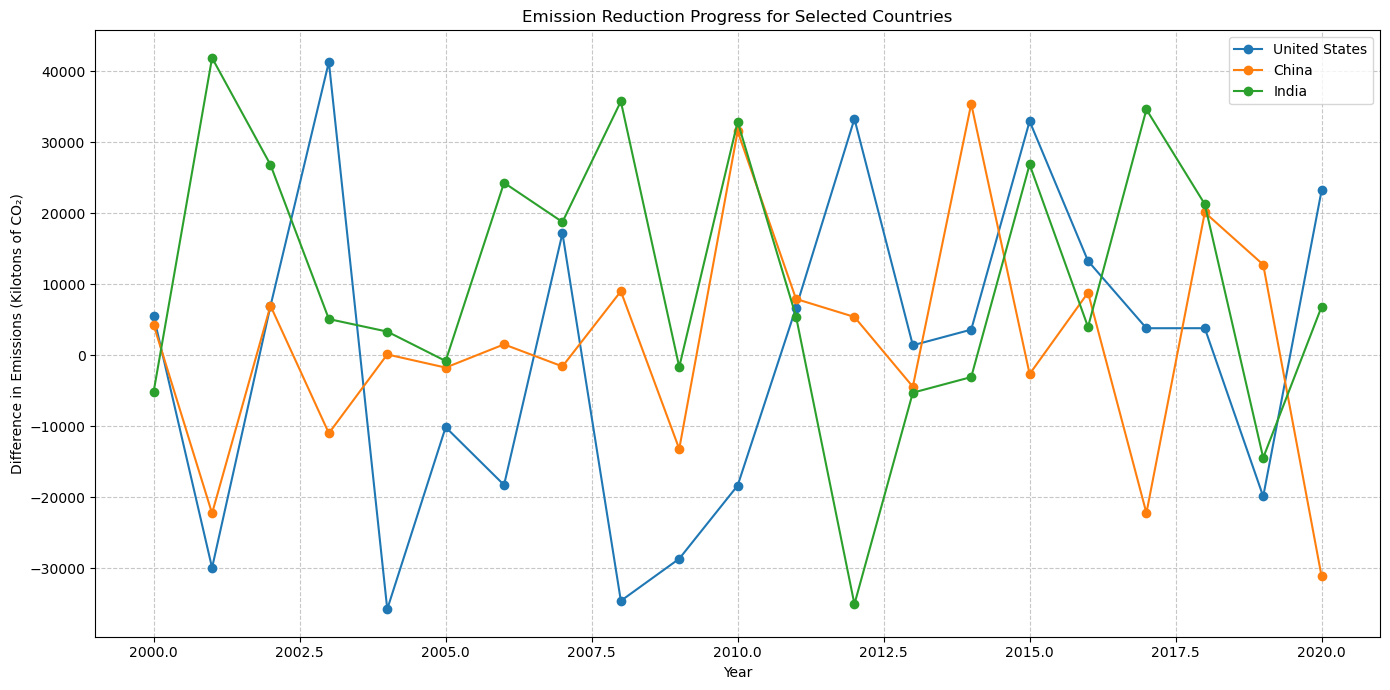

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a sample DataFrame
np.random.seed(42)  # For reproducibility

countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
years = range(2000, 2021)
data = []

for country in countries:
    for year in years:
        data.append({
            'Country': country,
            'Region': 'Sample Region',  # Placeholder
            'Date': f'{year}-01-01',
            'Kilotons of Co2': np.random.randint(5000, 50000),  # Simulated actual emissions
            'Metric Tons Per Capita': np.random.uniform(1, 10),  # Placeholder
            'Month': 1,
            'Year': year,
            'Target Emissions': np.random.randint(4000, 45000),  # Simulated target emissions
        })

emission_targets_df = pd.DataFrame(data)

# Step 2: Calculate the difference between actual and target emissions
emission_targets_df['Difference'] = emission_targets_df['Kilotons of Co2'] - emission_targets_df['Target Emissions']

# Step 3: Plot differences for selected countries
countries_to_plot = ['United States', 'China', 'India']
plt.figure(figsize=(14, 7))
for country in countries_to_plot:
    country_data = emission_targets_df[emission_targets_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Difference'], label=country, marker='o')

plt.title('Emission Reduction Progress for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Difference in Emissions (Kilotons of CO₂)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


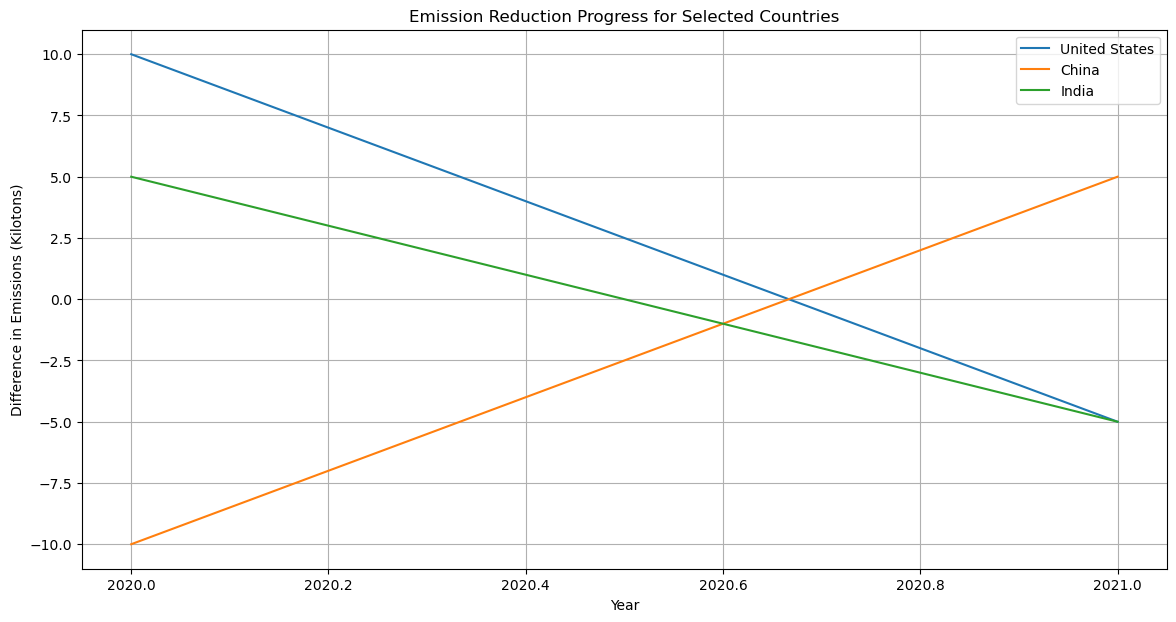

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (you would replace this with your actual data)
data = {
    'Country': ['United States', 'China', 'India', 'United States', 'China', 'India'],
    'Year': [2020, 2020, 2020, 2021, 2021, 2021],
    'Target Emissions': [100, 150, 120, 95, 145, 115],
    'Actual Emissions': [110, 140, 125, 90, 150, 110]
}

# Create a pandas DataFrame
emission_targets_df = pd.DataFrame(data)

# Calculate the difference between actual and target emissions
emission_targets_df['Difference'] = emission_targets_df['Actual Emissions'] - emission_targets_df['Target Emissions']

# Plot the differences for a few countries
countries_to_plot = ['United States', 'China', 'India']
plt.figure(figsize=(14, 7))
for country in countries_to_plot:
    country_data = emission_targets_df[emission_targets_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Difference'], label=country)

plt.title('Emission Reduction Progress for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Difference in Emissions (Kilotons)')
plt.legend()
plt.grid(True)
plt.show()
